In [20]:
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os
import glob
from osgeo import gdal
import scipy.ndimage
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import csv
import pprint
import h5py 
import gdal
from gdalconst import *
import datetime
import seaborn as sns
from numpy import zeros, newaxis
from scipy import stats
from statistics import mean
from matplotlib import style
import seaborn as sns

In [21]:
# choose size of boxplots
size = (15,10)
category_order =  'low_low', 'low_med', 'low_high', 'med_low', 'med_med', 'med_high', 'high_low', 'high_med', 'high_high'
HUE_order = 'sub500', '500_1500', 'above1500'

In [31]:
data = pd.read_csv("D:\\masters_data\\output\\csv\\Analysis\\total_data.csv", header=None)

data.columns = ["mean_canopy", "canopy_max_height", "canopy_min_height", "canopy_median_height", "canopy_openness", 
                "BA_category", "First_burns", "Second_burns", "Total_burns", "rainfall_band", "mean NDVI",  "Tile", "Total_rainfall"]

data['canopy_spread'] = (data['canopy_max_height'] - data['canopy_min_height']) /  data['mean_canopy']

In [32]:
data

,mean_canopy,canopy_max_height,canopy_min_height,canopy_median_height,canopy_openness,BA_category,First_burns,Second_burns,Total_burns,rainfall_band,mean NDVI,Tile,Total_rainfall,canopy_spread
0,6.04,9.64,2.290,6.42,1.97,low_low,0.0,0.0,0.0,500_1500,979.815534,H19V07,NaN,1.216887
1,2.26,5.38,0.511,1.74,1.40,low_low,0.0,0.0,0.0,500_1500,986.992718,H19V07,NaN,2.154425
2,2.53,7.31,0.514,1.18,2.25,low_low,0.0,0.0,0.0,500_1500,972.259709,H19V07,NaN,2.686166
3,5.72,8.51,0.622,5.94,2.13,low_low,0.0,0.0,0.0,500_1500,976.728155,H19V07,NaN,1.379021
4,5.20,8.15,0.520,5.08,1.86,low_low,0.0,0.0,0.0,500_1500,978.490291,H19V07,NaN,1.467308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305303,2.32,7.27,0.537,1.46,1.89,med_high,6.0,8.0,14.0,500_1500,5547.019417,H20V08,1721.141523,2.902155
305304,2.03,5.03,0.505,1.63,1.31,med_med,6.0,3.0,9.0,500_1500,5708.546117,H20V08,1436.409851,2.229064
305305,6.36,11.30,0.524,6.64,2.75,low_low,0.0,0.0,0.0,500_1500,5775.082524,H20V08,1196.989934,1.694340
305306,5.75,12.20,0.530,6.44,3.28,low_low,0.0,0.0,0.0,500_1500,5613.589806,H20V08,1042.818575,2.029565


In [24]:
# data sections
# rainfall
data_sub500 = data.loc[data['rainfall_band'] == "sub500"]
data_500_1500 = data.loc[data['rainfall_band'] == "500_1500"]
data_above1500 = data.loc[data['rainfall_band'] == "above1500"]

# BA_category
data_low_low = data.loc[data['BA_category'] == "low_low"]
data_low_med = data.loc[data['BA_category'] == "low_med"]
data_low_high = data.loc[data['BA_category'] == "low_high"]
data_med_low = data.loc[data['BA_category'] == "med_low"]
data_med_med = data.loc[data['BA_category'] == "med_med"]
data_med_high = data.loc[data['BA_category'] == "med_high"]
data_high_low = data.loc[data['BA_category'] == "high_low"]
data_high_med = data.loc[data['BA_category'] == "high_med"]
data_high_high = data.loc[data['BA_category'] == "high_high"]

# tile
H19V07 = data.loc[data['Tile'] == "H19V07"]
H19V08 = data.loc[data['Tile'] == "H19V08"]
H20V07 = data.loc[data['Tile'] == "H20V07"]
H20V08 = data.loc[data['Tile'] == "H20V08"]

In [25]:
H19V07

,mean_canopy,canopy_max_height,canopy_min_height,canopy_median_height,canopy_openness,BA_category,First_burns,Second_burns,Total_burns,rainfall_band,Total_rainfall,Tile,mean NDVI,canopy_spread
0,6.04,9.64,2.290,6.42,1.97,low_low,0.0,0.0,0.0,500_1500,979.815534,H19V07,NaN,1.216887
1,2.26,5.38,0.511,1.74,1.40,low_low,0.0,0.0,0.0,500_1500,986.992718,H19V07,NaN,2.154425
2,2.53,7.31,0.514,1.18,2.25,low_low,0.0,0.0,0.0,500_1500,972.259709,H19V07,NaN,2.686166
3,5.72,8.51,0.622,5.94,2.13,low_low,0.0,0.0,0.0,500_1500,976.728155,H19V07,NaN,1.379021
4,5.20,8.15,0.520,5.08,1.86,low_low,0.0,0.0,0.0,500_1500,978.490291,H19V07,NaN,1.467308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76322,2.32,7.27,0.537,1.46,1.89,high_high,8.0,8.0,16.0,sub500,4607.599515,H19V07,NaN,2.902155
76323,2.03,5.03,0.505,1.63,1.31,med_high,6.0,8.0,14.0,sub500,4039.230583,H19V07,NaN,2.229064
76324,6.36,11.30,0.524,6.64,2.75,med_med,5.0,3.0,8.0,sub500,4551.342233,H19V07,NaN,1.694340
76325,5.75,12.20,0.530,6.44,3.28,high_med,7.0,5.0,12.0,sub500,5154.250000,H19V07,NaN,2.029565


In [26]:
print((sum(H19V07['Total_rainfall']) / len(H19V07)))
print((sum(H19V08['Total_rainfall']) / len(H19V08)))
print((sum(H20V07['Total_rainfall']) / len(H20V07)))
print((sum(H20V08['Total_rainfall']) / len(H20V08)))

1361.220450022074
5945.096796696517
1372.1269774873933
3678.020082886822


## Data Averages Section

In [24]:
print("Total mean canopy: {}".format(round(data['mean_canopy'].mean(), 3)))
print("Sub 500mm/yr mean canopy: {}".format(round(data_sub500['mean_canopy'].mean(), 3)))
print("500 1500 mm/yr mean canopy: {}".format(round(data_500_1500['mean_canopy'].mean(), 3)))
print("Above 1500 mm/yr mean canopy: {}".format(round(data_above1500['mean_canopy'].mean(), 3)))

# might be worth taking out vlaues where canopy height is above 50m say?
# doesn't include 0 values, doesn't include where data isn't savannahs (check)

Total mean canopy: 9.09
Sub 500mm/yr mean canopy: 8.783
500 1500 mm/yr mean canopy: 9.115
Above 1500 mm/yr mean canopy: 11.135


In [25]:
print("Total mean canopy openness: {}".format(round(data['canopy_openness'].mean(), 3)))
print("Sub 500mm/yr mean canopy openness: {}".format(round(data_sub500['canopy_openness'].mean(), 3)))
print("500 1500 mm/yr mean canopy openness: {}".format(round(data_500_1500['canopy_openness'].mean(), 3)))
print("Above 1500 mm/yr mean canopy openness: {}".format(round(data_above1500['canopy_openness'].mean(), 3)))

Total mean canopy openness: 4.972
Sub 500mm/yr mean canopy openness: 4.851
500 1500 mm/yr mean canopy openness: 4.978
Above 1500 mm/yr mean canopy openness: 5.93


In [26]:
print("Total mean canopy spread: {}".format(round(data['canopy_spread'].mean(), 3)))
print("Sub 500mm/yr mean canopy spread: {}".format(round(data_sub500['canopy_spread'].mean(), 3)))
print("500 1500 mm/yr mean canopy spread: {}".format(round(data_500_1500['canopy_spread'].mean(), 3)))
print("Above 1500 mm/yr mean canopy spread: {}".format(round(data_above1500['canopy_spread'].mean(), 3)))

Total mean canopy spread: 2.174
Sub 500mm/yr mean canopy spread: 2.183
500 1500 mm/yr mean canopy spread: 2.172
Above 1500 mm/yr mean canopy spread: 2.179


## Data Plots

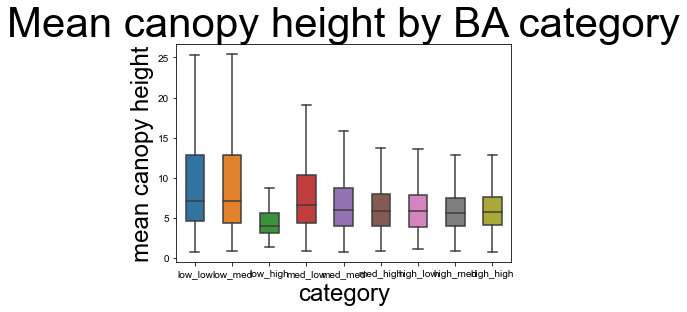

In [27]:
boxplot = sns.boxplot(x='BA_category', y='mean_canopy', data = data,showfliers=False, order=category_order, width=0.5)
boxplot.axes.set_title("Mean canopy height by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("mean canopy height", fontsize=24)
sns.set(rc={'figure.figsize':size})
plt.show()

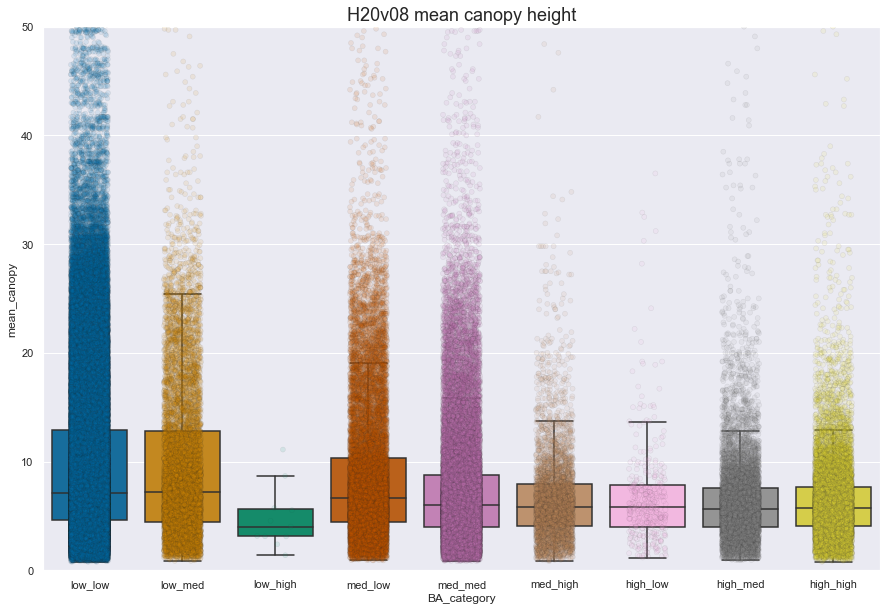

In [28]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  order=category_order, showfliers=False,
                 palette="colorblind")
ax = sns.stripplot(y='mean_canopy', x='BA_category', 
                 data=data, order=category_order, palette="colorblind",  
                 split=True, linewidth=0.5,alpha=0.1,jitter=0.2,
                 color='k')
ax.set_title('H20v08 mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()

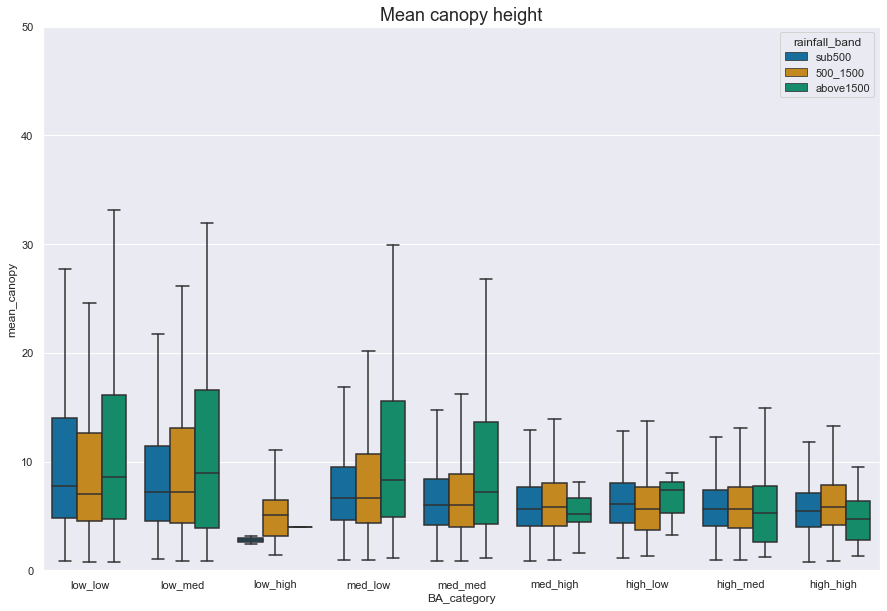

In [29]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  showfliers=False, palette="colorblind",
                 order=category_order, hue = "rainfall_band", hue_order = HUE_order)
ax.set_title('Mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()

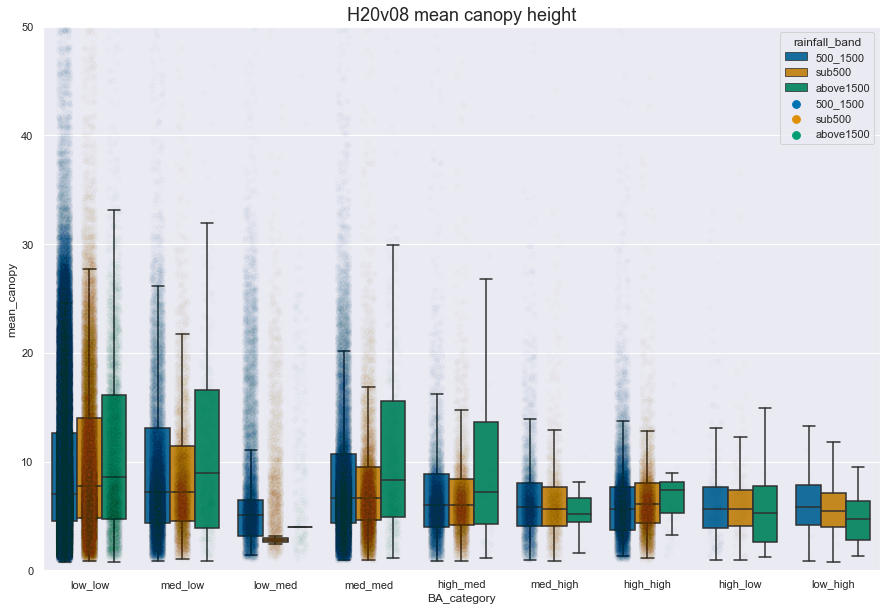

In [30]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  showfliers=False, palette="colorblind",
                 order=category_order, hue = "rainfall_band")
ax = sns.stripplot(y='mean_canopy', x='BA_category', 
                 data=data, palette="colorblind",  
                 split=True, linewidth=0.5,alpha=0.01,jitter=0.2,
                 color='k', hue = "rainfall_band")
ax.set_title('H20v08 mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()
# could be interesting to calculate the data to two orders of magnitude - whats the word.

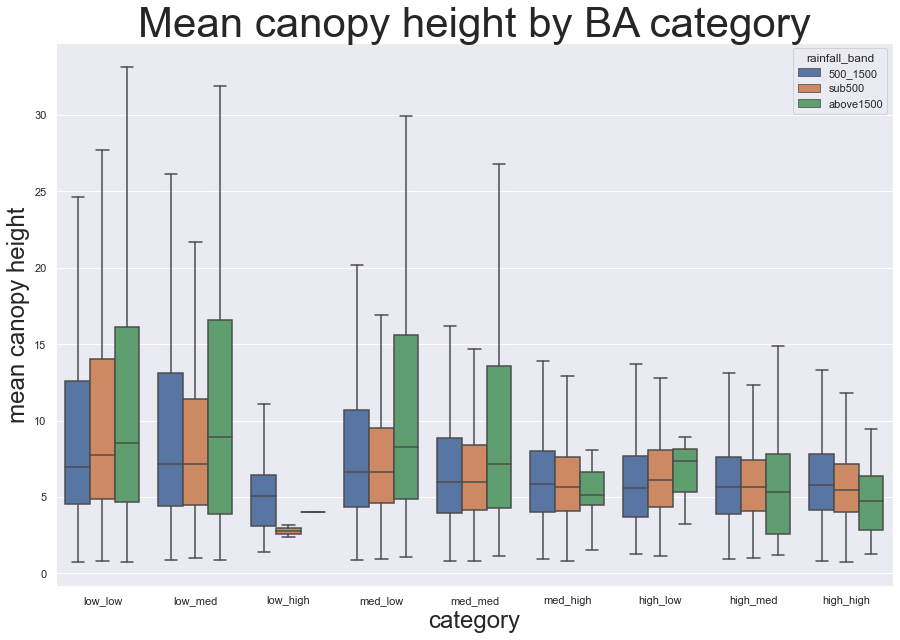

In [31]:
boxplot = sns.boxplot(x='BA_category', y='mean_canopy', data = data,showfliers=False, order=category_order, width=0.8, 
                      hue='rainfall_band')
boxplot.axes.set_title("Mean canopy height by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("mean canopy height", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

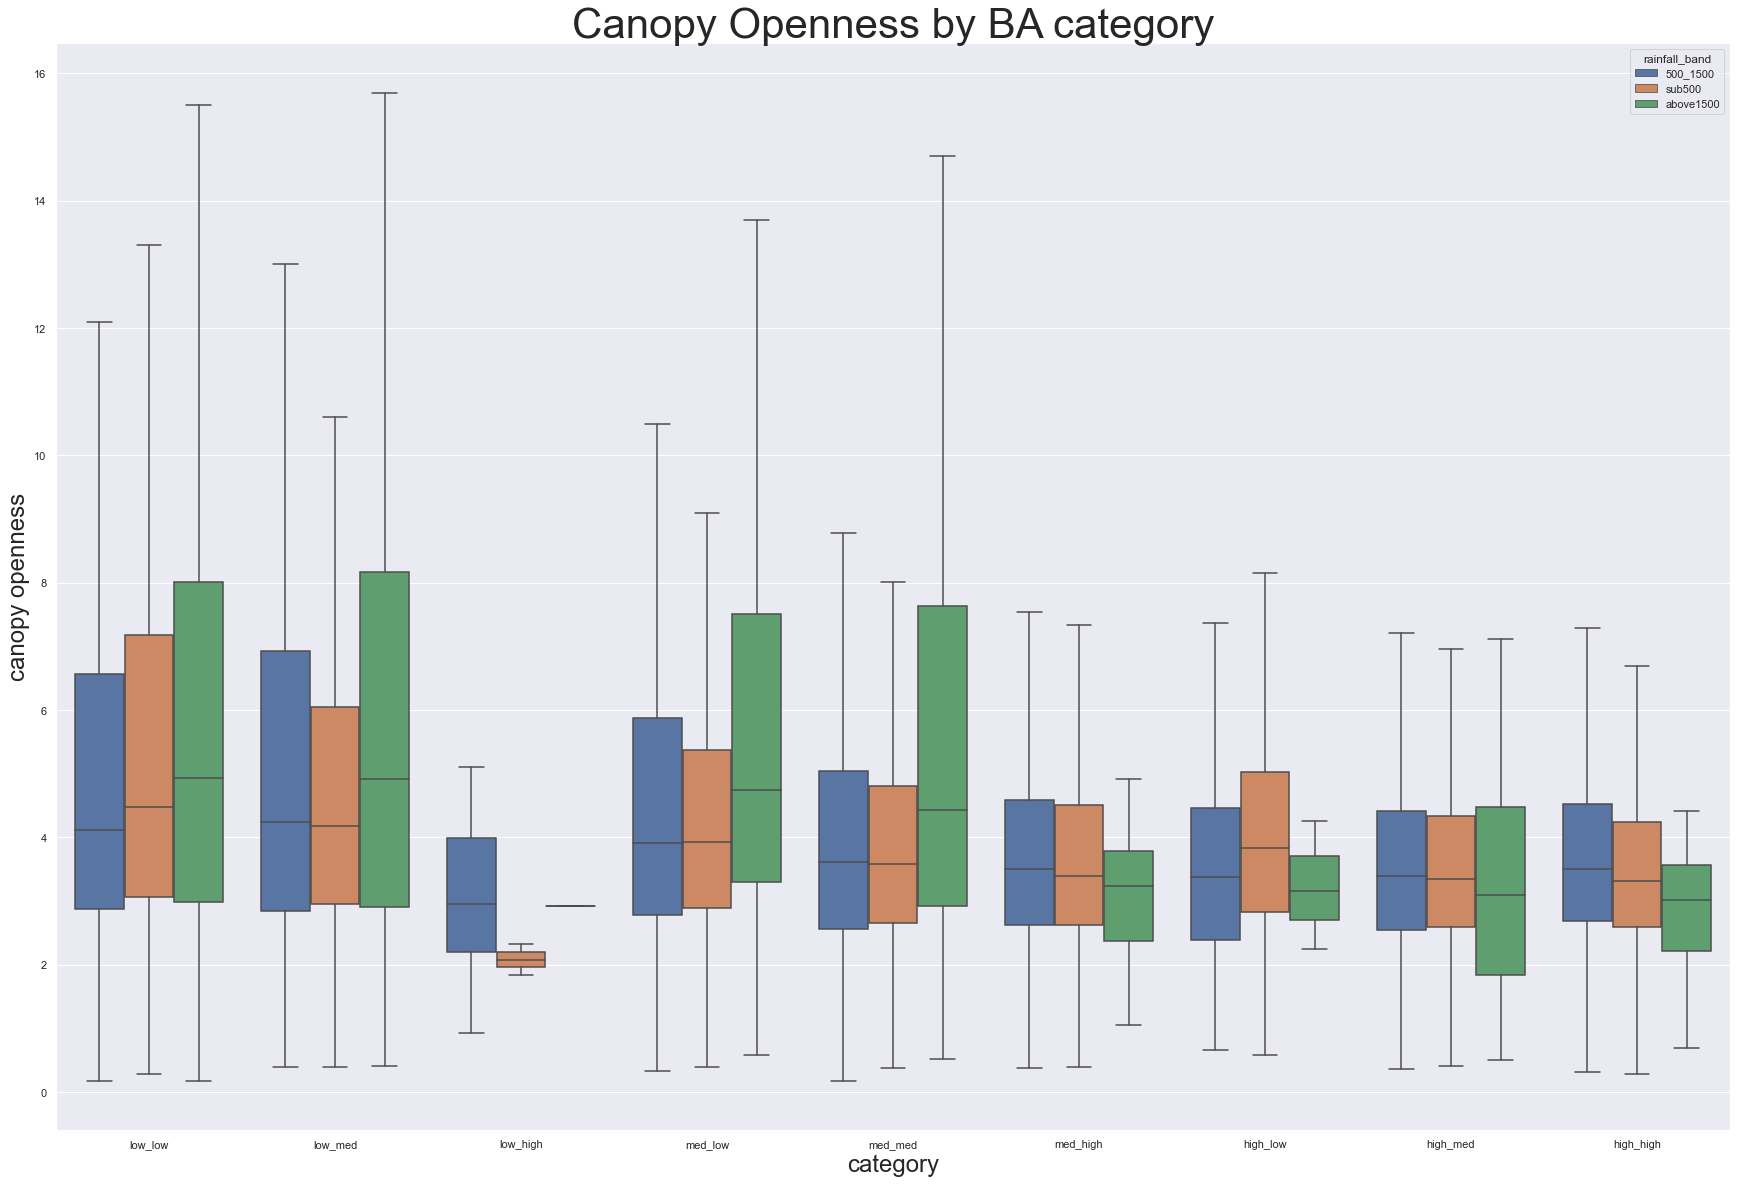

In [32]:
boxplot = sns.boxplot(x='BA_category', y='canopy_openness', data = data,showfliers=False, order=category_order, width=0.8,
                     hue='rainfall_band')
boxplot.axes.set_title("Canopy Openness by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("canopy openness", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

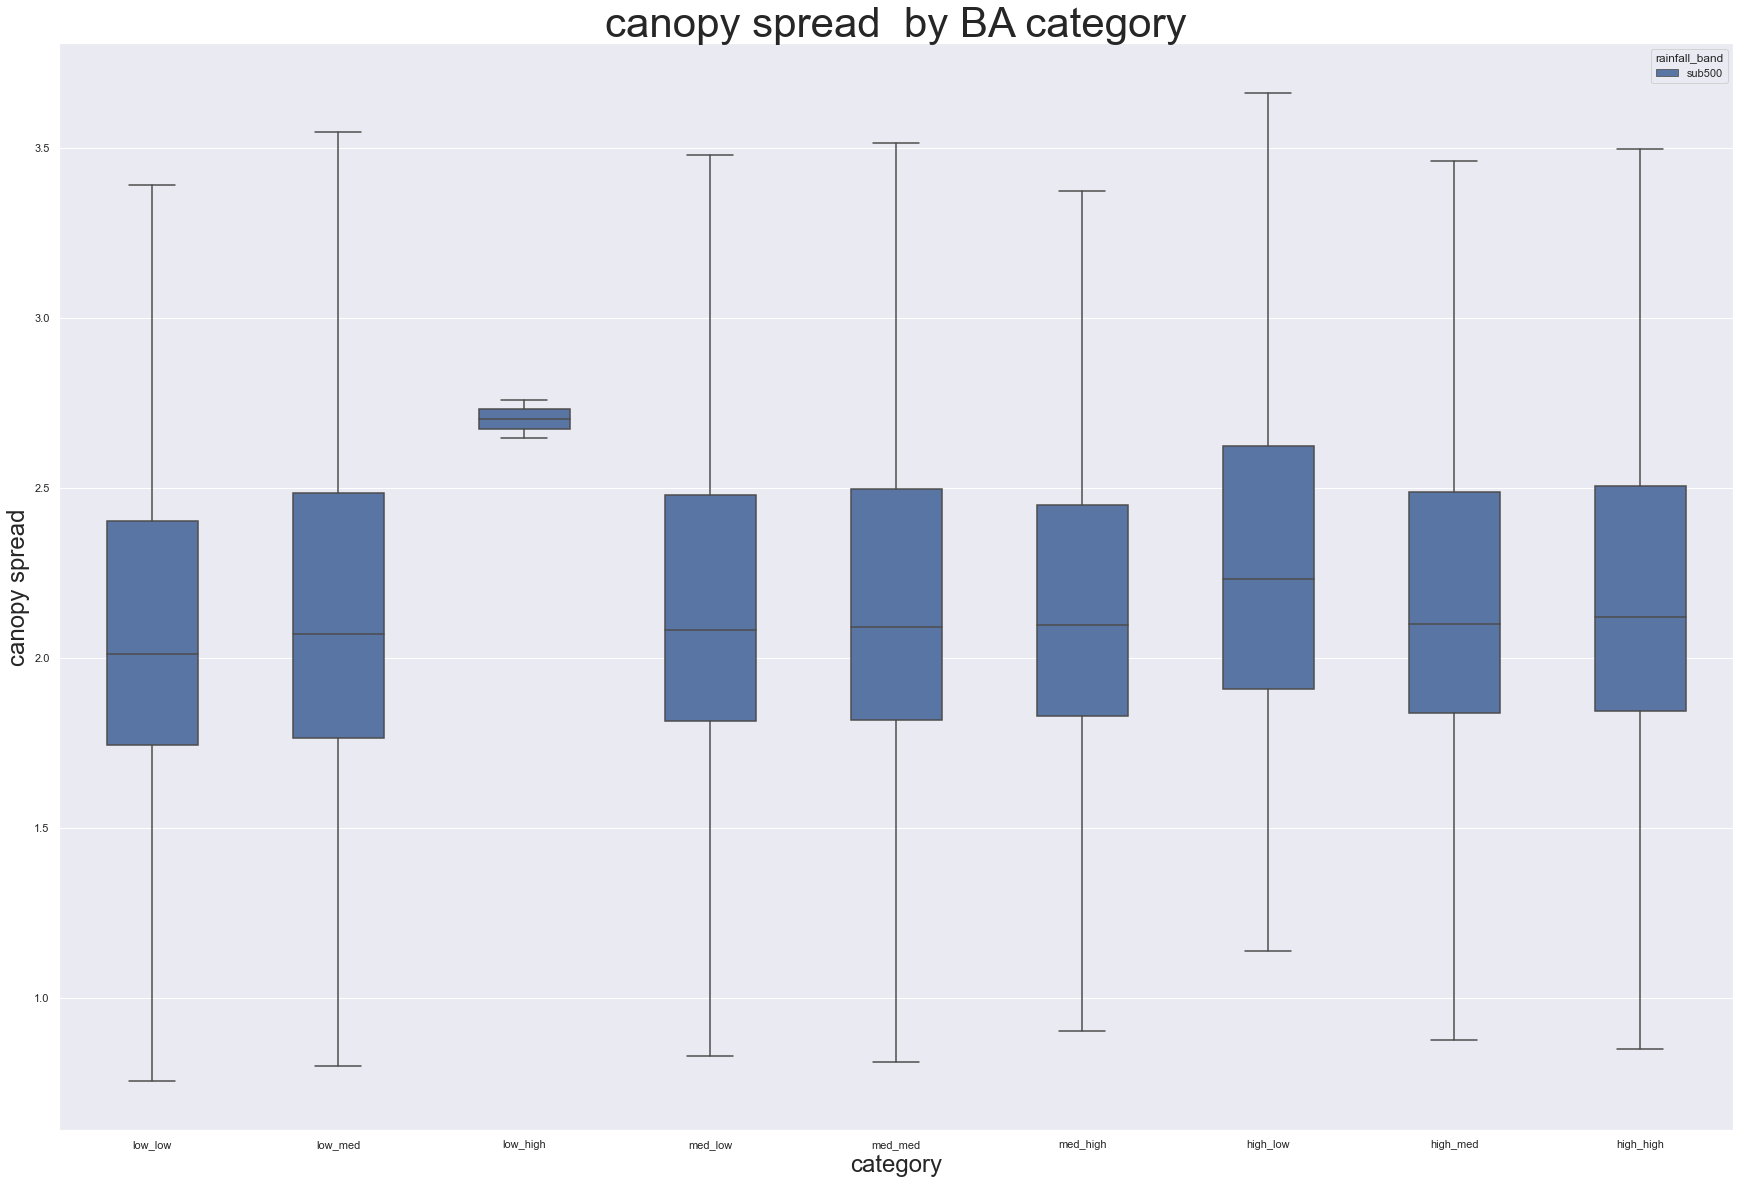

In [33]:
boxplot = sns.boxplot(x='BA_category', y='canopy_spread', data = data_sub500,showfliers=False, order=category_order, width=0.5, hue = 'rainfall_band')
boxplot.axes.set_title("canopy spread  by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("canopy spread", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

In [34]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [35]:
m, b = best_fit_slope_and_intercept(data['mean_canopy'],data['canopy_spread'])
regression_line = [(m*x)+b for x in data['mean_canopy']]

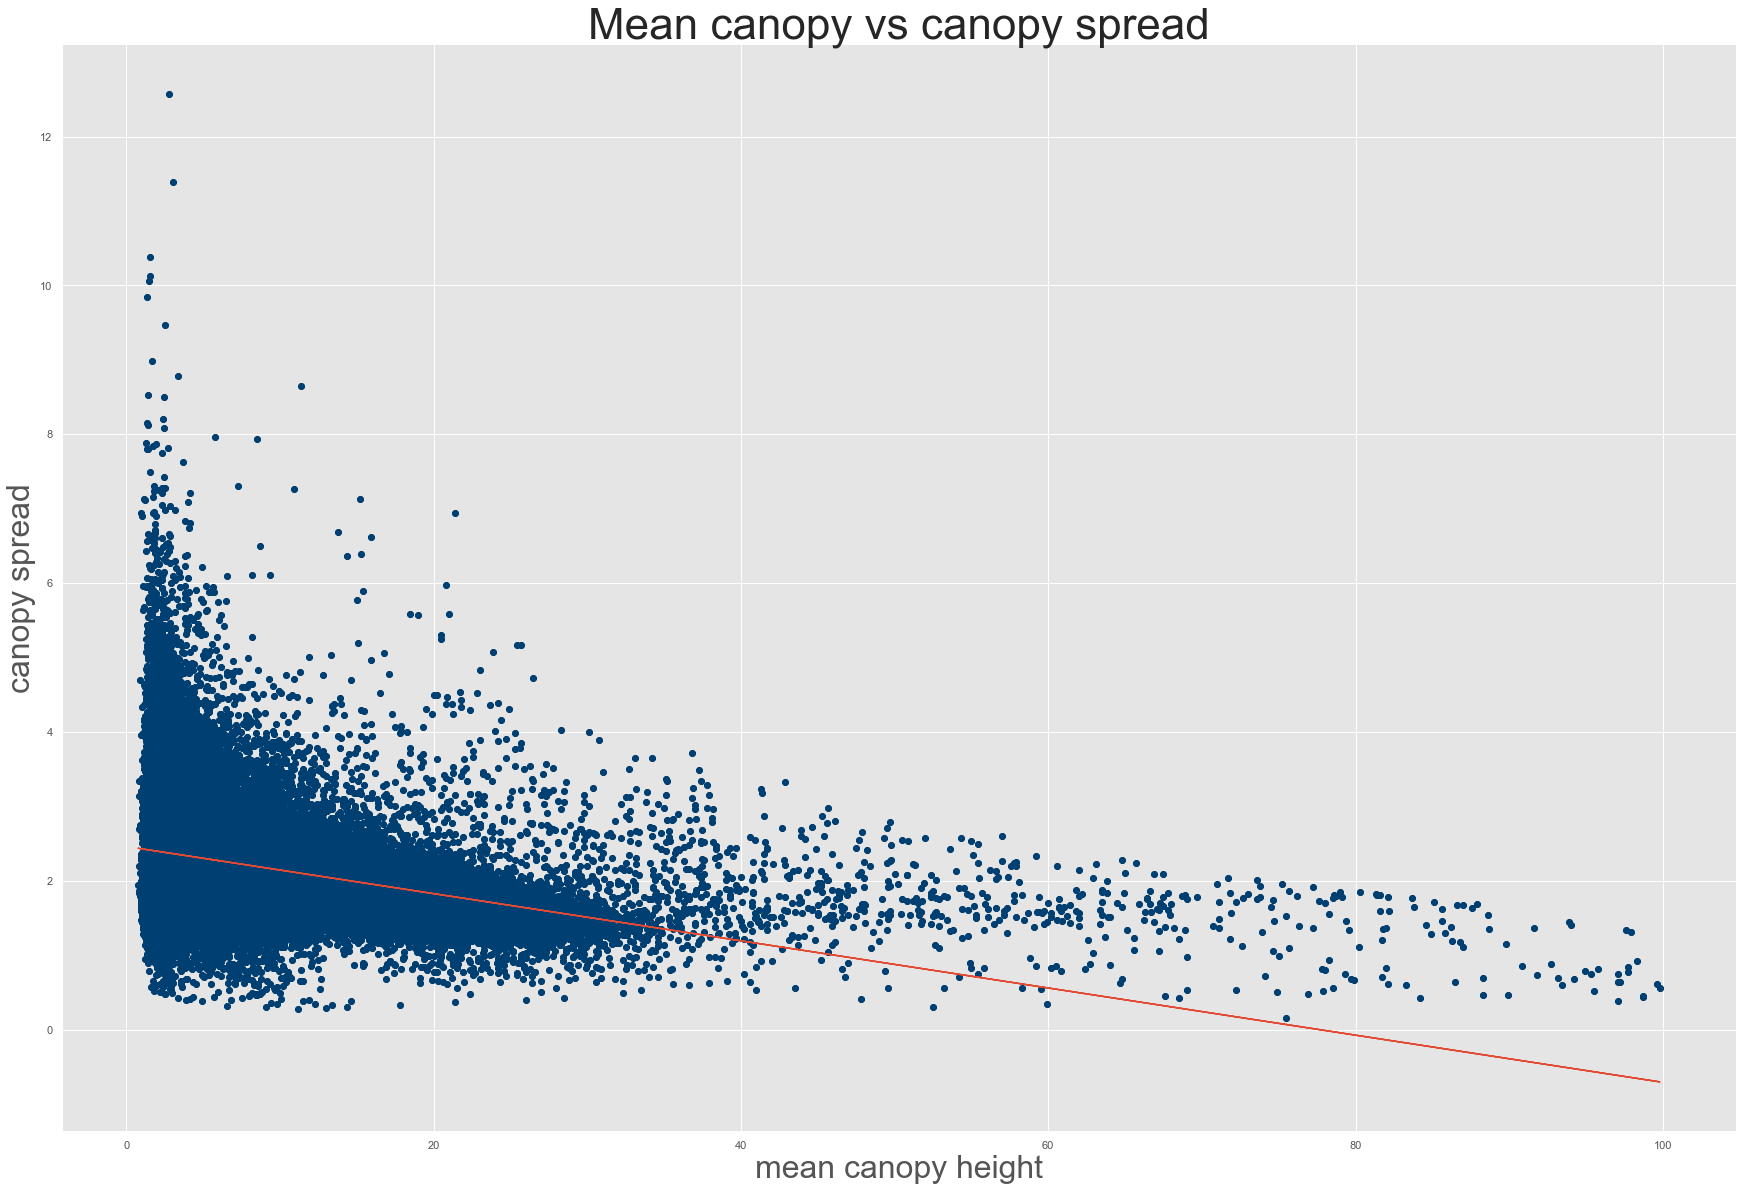

In [36]:
style.use('ggplot')
plt.scatter(data['mean_canopy'],data['canopy_spread'],color='#003F72')
plt.plot(data['mean_canopy'], regression_line)
plt.title('Mean canopy vs canopy spread', fontsize = 44)
plt.xlabel('mean canopy height', fontsize = 32)
plt.ylabel('canopy spread', fontsize = 32)

plt.show()

shows an icrease in tree heterogeniety with increasing canopy height. As expected.